## ❤️ EmotionArcs

This script showcases the data released, which can be used to look into the emotional intensities and emotion arcs of 9,000 novels.



In [1]:
try:
    import pandas as pd
    import json
    import glob
    import seaborn as sns
    import matplotlib.pyplot as plt
except:
    !pip install pandas, json, glob, seaborn, matplotlib.pyplot

/var/folders/8t/vv7n69jj4sn7sy038gdzcqh5zptf_4/T/ipykernel_84592/1785728372.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Download

Download the data by cloning the GitHub repository and add the path in the cell below

In [14]:
path = "/Users/au324704/Desktop/EmoArc" # set path to the directory cloned from the github repository
all_files = glob.glob(f"{path}/data/*")

# getting the two different types of data (intensities and arcs)
all_arcs_files = [f for f in all_files if 'arcs' in f]
intensities_file = [f for f in all_files if 'intensities' in f]

In [15]:
all_arcs_files

['/Users/au324704/Desktop/EmoArc/data/tru_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/joy_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/ant_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/fea_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/sad_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/dis_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/ang_arcs.json',
 '/Users/au324704/Desktop/EmoArc/data/sur_arcs.json']

In [16]:
# Opening the arcs files and compiling them into a dictionary

emotional_dictionary = {}

for emotion_path in all_arcs_files:

    emotion_arcs = {}

    # get name of emotion
    emotion_name = emotion_path.split("/")[-1].split(".")[0]
    print(emotion_name)

    # open file
    with open(emotion_path) as f:
        emotion = json.load(f)
    
    # save to dict
    emotional_dictionary[emotion_name] = emotion

# Creating an arcs df
df_arcs = pd.DataFrame.from_dict(emotional_dictionary).reset_index()
df_arcs.rename(columns={'index': 'BOOK_ID'}, inplace=True)
df_arcs.head()

tru_arcs
joy_arcs
ant_arcs
fea_arcs
sad_arcs
dis_arcs
ang_arcs
sur_arcs


,BOOK_ID,tru_arcs,joy_arcs,ant_arcs,fea_arcs,sad_arcs,dis_arcs,ang_arcs,sur_arcs
0,1.0,"[14.102, 18.345, 11.452, 10.397, 9.349, 10.938...","[7.868, 17.794, 10.673, 7.205, 10.804, 7.634, ...","[5.621, 11.477, 9.17, 5.539, 6.478, 6.086, 4.5...","[8.094, 4.421, 1.818, 2.737, 3.766, 7.43, 4.21...","[6.099, 2.849, 4.055, 2.109, 3.365, 7.712, 4.2...","[4.086, 1.985, 3.289, 1.438, 2.627, 4.444, 0.0...","[5.385, 5.413, 1.436, 3.604, 3.612, 5.44, 1.36...","[3.938, 3.689, 1.751, 1.21, 4.068, 3.149, 1.89..."
1,3.0,"[7.303, 5.704, 1.477, 6.583, 7.702, 7.339, 6.1...","[6.356, 4.768, 4.568, 4.75, 5.39, 2.382, 5.364...","[7.259, 4.811, 3.742, 6.061, 7.748, 2.457, 5.6...","[8.075, 2.17, 4.98, 5.315, 11.891, 8.511, 10.1...","[10.258, 3.092, 7.575, 4.696, 12.891, 8.784, 7...","[3.14, 1.655, 2.87, 2.812, 4.401, 2.829, 4.656...","[5.086, 3.456, 3.849, 2.942, 7.869, 8.388, 7.7...","[7.641, 1.039, 2.477, 2.374, 5.194, 2.212, 5.5..."
2,13.0,"[9.537, 4.806, 10.072, 6.445, 9.921, 10.062, 1...","[7.705, 8.154, 7.088, 8.255, 7.011, 11.411, 11...","[6.929, 8.228, 5.39, 7.796, 4.03, 6.692, 6.91,...","[0.719, 3.625, 3.229, 3.362, 2.283, 3.368, 3.0...","[2.887, 5.362, 4.747, 4.558, 2.687, 4.891, 3.5...","[0.406, 4.953, 1.234, 1.266, 0.508, 1.532, 1.3...","[1.638, 5.381, 0.894, 2.929, 0.813, 0.942, 2.5...","[2.117, 4.149, 2.991, 3.454, 1.578, 2.031, 2.7..."
3,15.0,"[5.148, 5.805, 5.843, 10.92, 5.703, 10.335, 8....","[10.385, 7.467, 14.55, 9.427, 14.0, 12.321, 11...","[4.07, 3.532, 2.063, 3.992, 3.031, 8.328, 7.19...","[2.698, 1.422, 3.928, 0.741, 2.54, 2.142, 3.81...","[3.704, 2.244, 3.85, 2.314, 3.327, 3.344, 5.94...","[1.688, 1.368, 3.048, 0.399, 1.954, 2.086, 3.6...","[3.81, 1.324, 4.291, 0.721, 2.169, 1.988, 3.21...","[2.477, 2.812, 8.432, 1.968, 4.518, 3.454, 1.5..."
4,21.0,"[8.346, 14.72, 14.795, 13.156, 12.912, 17.607,...","[9.452, 11.54, 17.14, 14.132, 11.754, 17.105, ...","[7.522, 6.321, 7.86, 7.724, 8.503, 10.054, 5.8...","[2.54, 3.243, 7.43, 3.552, 3.216, 3.861, 4.559...","[3.407, 4.132, 9.58, 4.225, 3.703, 6.081, 7.05...","[2.289, 2.984, 5.063, 0.485, 2.218, 3.047, 2.6...","[3.461, 5.69, 9.105, 0.996, 1.316, 3.666, 3.46...","[0.797, 3.493, 4.562, 3.352, 1.5, 3.023, 1.516..."


In [17]:
# Opening the intensities file and adding it to the dataframe
with open(intensities_file[0]) as f:
    intensities = json.load(f)

df_intensities = pd.DataFrame.from_dict(intensities, orient='index').reset_index()
df_intensities.rename(columns={'index': 'BOOK_ID'}, inplace=True)

df = pd.merge(df_intensities, df_arcs, on='BOOK_ID').reset_index(drop=True)
df.head()

,BOOK_ID,INTENS_anger,INTENS_anticipation,INTENS_disgust,INTENS_fear,INTENS_joy,INTENS_sadness,INTENS_surprise,INTENS_trust,AUTH_LAST,...,PUBL_DATE,TITLE,tru_arcs,joy_arcs,ant_arcs,fea_arcs,sad_arcs,dis_arcs,ang_arcs,sur_arcs
0,20564.0,23.520468,76.906702,19.557844,29.383902,71.230915,46.496952,34.861538,82.532918,Webb,...,1963,The Graduate,"[5.961, 7.164, 5.0, 5.313, 6.982, 5.82, 2.643,...","[4.085, 5.732, 5.733, 3.71, 3.153, 5.294, 2.14...","[4.319, 4.694, 4.577, 2.616, 3.359, 2.851, 1.4...","[0.422, 0.406, 1.266, 2.819, 0.652, 3.157, 0.9...","[2.755, 2.684, 1.059, 4.357, 1.26, 1.669, 2.92...","[0.344, 0.133, 0.899, 1.141, 0.438, 0.399, 4.2...","[1.401, 1.131, 0.422, 0.561, 0.764, 0.772, 0.4...","[0.586, 2.256, 2.047, 0.578, 1.711, 2.766, 2.7..."
1,25455.0,31.690087,79.197897,30.002665,43.669505,111.444288,67.794033,33.405493,106.391353,Cameron,...,1994,The Weekend,"[5.839, 5.861, 3.156, 5.281, 3.921, 5.748, 4.7...","[8.676, 8.795, 5.794, 7.091, 7.387, 7.515, 5.6...","[6.602, 5.454, 4.366, 4.772, 3.779, 3.226, 3.8...","[3.292, 2.5, 3.641, 1.203, 5.462, 2.306, 2.526...","[6.843, 2.427, 1.674, 1.64, 7.433, 1.444, 3.09...","[1.289, 1.899, 0.625, 1.312, 1.274, 1.486, 0.2...","[1.904, 2.678, 1.706, 1.324, 1.539, 1.071, 0.5...","[3.256, 2.663, 0.976, 0.563, 2.945, 1.71, 0.42..."
2,25893.0,63.432568,87.985586,30.762940,94.033732,68.241786,69.474771,44.738659,101.337125,Hamilton,...,1998,A Cold Day In Paradise,"[6.0, 7.789, 2.42, 2.758, 7.287, 6.722, 6.865,...","[6.799, 4.396, 2.254, 2.247, 3.654, 5.562, 5.7...","[5.977, 8.047, 2.374, 3.328, 2.756, 4.793, 8.6...","[4.009, 7.527, 1.96, 5.662, 3.797, 1.016, 1.76...","[1.95, 5.05, 0.731, 4.616, 4.032, 2.452, 2.977...","[1.415, 1.829, 0.133, 1.539, 2.086, 0.719, 1.6...","[3.793, 3.963, 0.411, 4.054, 3.718, 0.708, 1.8...","[3.906, 6.689, 1.508, 2.757, 1.313, 2.68, 4.85..."
3,10552.0,46.316078,104.061841,28.702605,50.505605,106.271628,55.472400,49.070962,107.349779,McCoy,...,1938,I Should Have Stayed Home,"[4.571, 5.586, 5.881, 4.311, 7.359, 3.476, 5.2...","[5.853, 3.294, 6.237, 3.606, 4.885, 5.897, 6.1...","[7.41, 5.585, 7.986, 2.882, 4.744, 3.928, 6.02...","[5.245, 7.599, 6.216, 2.269, 2.55, 8.101, 2.21...","[3.466, 12.216, 7.015, 3.314, 2.108, 6.299, 2....","[0.656, 4.766, 3.071, 0.898, 2.147, 3.226, 1.7...","[1.577, 7.541, 3.596, 0.75, 1.981, 6.905, 2.03...","[5.484, 3.703, 1.719, 1.633, 1.445, 3.25, 1.98..."
4,25269.0,45.904266,81.471076,29.567275,61.280643,101.297648,58.875041,43.444164,121.507621,Robbins,...,1991,The Piranhas,"[6.734, 5.013, 4.562, 13.0, 9.462, 9.142, 9.65...","[5.351, 2.395, 2.057, 6.976, 3.362, 6.99, 6.83...","[5.209, 4.164, 4.18, 4.342, 5.711, 7.113, 3.64...","[7.518, 7.599, 7.58, 3.077, 7.058, 3.575, 2.34...","[7.938, 7.363, 10.077, 7.271, 13.737, 5.171, 2...","[2.624, 1.829, 3.179, 0.875, 0.75, 1.898, 1.12...","[3.087, 3.568, 4.033, 1.017, 1.54, 1.6, 1.2, 2...","[2.406, 2.968, 1.18, 0.344, 1.178, 2.227, 3.01..."


## 🔥 Comparing intensities

We can look at the intensities and correlate them with other things (like publication date)

💡 Keep an eye on our [Fabula-NET page](https://centre-for-humanities-computing.github.io/fabula-net/blog/), since we will soon be publishing other metadata to go with this dataset, such as GoodReads scores, etc. This dataset coming out will have the same BOOK_IDs indexing the titles, so that it's easy to use the datasets together.

In [18]:
feature_to_check = 'INTENS_anger'

df[['BOOK_ID', 'TITLE', 'AUTH_FIRST', 'AUTH_LAST','PUBL_DATE', feature_to_check]].nlargest(10, feature_to_check)

,BOOK_ID,TITLE,AUTH_FIRST,AUTH_LAST,PUBL_DATE,INTENS_anger
8522,1161.0,The Red Badge Of Courage,Stephen,Crane,1895,173.096326
7571,11604.0,Fools' Harvest,Erle,Cox,1939,159.796521
4734,25824.0,The Way Of The Traitor,Laura Joh,Rowland,1997,152.988242
8929,23994.0,The Curse Of The Mistwraith,Janny,Wurts,1993,152.490822
7848,20951.0,The Trojan War,Bernard,Evslin,1971,150.159442
7749,3699.0,The Beasts Of Tarzan,Edgar Rice,Burroughs,1914,149.869769
8748,10993.0,Conan The Conqueror,Robert E.,Howard,1950,149.862913
8865,4865.0,Men In War,Andreas,Latzko,1918,148.915752
6372,10852.0,Spirits Rebellious,Kahlil,Gibran,1947,147.604811
8233,3484.0,Fran,John Breckinridge,Ellis,1912,147.483488


<Axes: xlabel='PUBL_DATE', ylabel='INTENS_anger'>

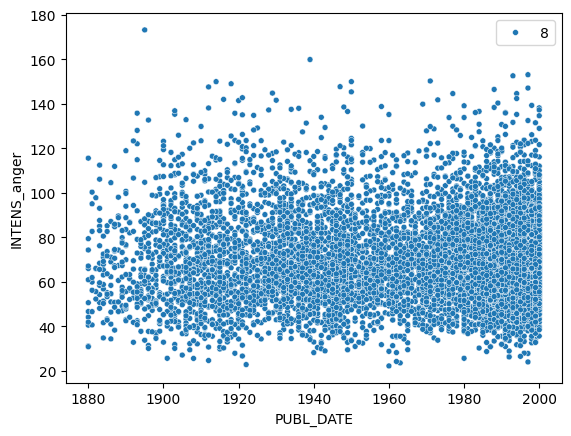

In [19]:
sns.scatterplot(data=df, x='PUBL_DATE', y=feature_to_check, size=8)

## 📈 Drawing arcs per emotion

We can also plot the arcs as such for all 8 emotions (for each book) 

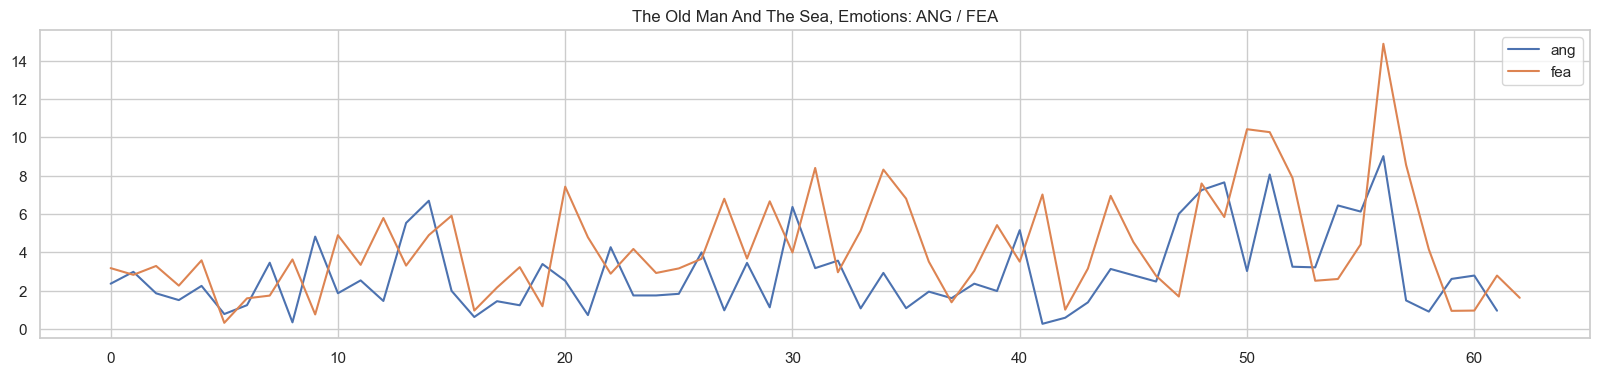

In [20]:
title = 'the old man and the sea' # we can change this to any title we want to check
emotion_to_plot = 'ang' # we can change these to any emotion we want to check
emotion_2_to_plot = 'fea'

# selecting the title
test_line = df.loc[df['TITLE'] == title.title()]

# selecting only the arcs columns
arcs_cols = [col for col in test_line.columns if 'arc' in col] 
sel_cols_test = test_line[arcs_cols]


# Selecting only one of the emotions
first_arc = sel_cols_test[f'{emotion_to_plot}_arcs'].values[0]
second_arc = sel_cols_test[f'{emotion_2_to_plot}_arcs'].values[0]

plt.figure(figsize=(20,4))
sns.set_theme(style='whitegrid')
plt.plot(first_arc)
plt.plot(second_arc)
plt.title(f'{title.title()}, Emotions: {emotion_to_plot.upper()} / {emotion_2_to_plot.upper()}')
plt.legend([f'{emotion_to_plot}', f'{emotion_2_to_plot}'])

## 🧪 Now we can also look into features/dynamics of each seperate emotion arc

NB: this essentially shows how to extract the features that are also extent in the "derived_features.json" file in the data folder. So if you don't want to extract yourself, just ➡️ skip down three cells to load the json directly

In [24]:
# Import necessary libraries
from scipy.stats import linregress
import numpy as np
from scipy import stats
from scipy.stats import entropy

# Define some functions for the measuring
def check_slope(emotion_level):
    x = list([i for i in range(len(emotion_level))])
    y = list(emotion_level) #merged_df['AngerLevel']

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    return slope

def check_skew(emotion_level):
    s, k = stats.skew(emotion_level), stats.kurtosis(emotion_level)
    return s,k

def normalize_to_probabilities(values):
    total = sum(values)
    if total == 0:
        return [0] * len(values)  # Handle division by zero
    else:
        return [v / total for v in values]
    
# For calculating entropy on intensities 
def calculate_entropy(row):
    # Normalize the row values to sum to 1, so they represent probabilities
    probabilities = normalize_to_probabilities(row)
    # Calculate the entropy using scipy's entropy function
    return entropy(probabilities, base=2)

In [25]:
# Extract some information about the arc shapes and dynamics
arc_cols = [col for col in df.columns if 'arc' in col] # Get emotion arcs only
intensities_cols = [col for col in df.columns if 'INTENS' in col] # Get emotion intensities cols only for entropy calculation

measures_dict = {}

# We loop through the rows/books
for index, row in df.iterrows():
    ids = row['BOOK_ID'] # get the book id

    # calculate emotion entropy per book from all the intensities values
    intensities = list(row[intensities_cols].values) 
    emotion_entropy = calculate_entropy(intensities)

    # Then we measure features of each emotion ard of each book
    # New dict to store emotion information for the current book ID
    arc_measures = {}
    for col in arc_cols:
        # save the emotion name
        emotion_name = col.split("_")[0].upper()

        arc_values = row[col]
        arc_levels = [e for e in arc_values if e>0] # filter

        # calculate all the measures of arcs
        if len(arc_levels)>0:
            slope = check_slope(arc_levels)
            s, k = check_skew(arc_levels)
            mean = sum(arc_levels)/len(arc_levels)
            overall = sum(arc_levels)

    # Store emotion information under the emotion name
            arc_measures[f"{emotion_name}_SLOPE"] = slope
            arc_measures[f"{emotion_name}_SKEW"] = s
            arc_measures[f"{emotion_name}_KURTOSIS"] = k
            arc_measures[f"{emotion_name}_MEAN"] = mean
            arc_measures[f"{emotion_name}_OVERALL"] = overall

    # Store the arc measures for the current book ID in the measures_dict
    measures_dict[ids] = arc_measures

    # Store emotion entropy in measures_dict
    measures_dict[ids]["EMOTION_ENTROPY"] = emotion_entropy


/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:19

In [26]:
# Make a df out of it
derived_features_df = pd.DataFrame.from_dict(measures_dict, orient='index').reset_index()
derived_features_df.rename(columns={'index': 'BOOK_ID'}, inplace=True)
derived_features_df.head()

,BOOK_ID,TRU_SLOPE,TRU_SKEW,TRU_KURTOSIS,TRU_MEAN,TRU_OVERALL,JOY_SLOPE,JOY_SKEW,JOY_KURTOSIS,JOY_MEAN,...,ANG_SKEW,ANG_KURTOSIS,ANG_MEAN,ANG_OVERALL,SUR_SLOPE,SUR_SKEW,SUR_KURTOSIS,SUR_MEAN,SUR_OVERALL,EMOTION_ENTROPY
0,20564.0,-0.003543,0.867436,1.053979,4.184097,644.351,-0.011951,0.950445,1.591475,3.634732,...,1.722151,3.224203,1.480879,183.629,0.003521,1.098690,1.350270,1.790599,272.171,2.822803
1,25455.0,0.001057,1.011505,2.123572,5.322326,718.514,-0.015222,0.633077,0.320113,5.534110,...,1.743027,5.037888,1.646300,214.019,-0.005082,1.101771,1.356348,1.696271,225.604,2.823577
2,25893.0,-0.005380,0.415274,-0.446969,5.067382,1074.285,-0.005187,0.887532,0.469172,3.412443,...,0.859370,0.789050,3.171958,672.455,-0.000612,0.697127,0.477051,2.258471,474.279,2.918773
3,10552.0,0.004245,0.761323,0.501706,5.364354,606.172,-0.004077,0.517517,-0.397744,5.310478,...,1.384975,1.458561,2.377573,261.533,-0.004867,0.920720,0.827128,2.452115,277.089,2.862758
4,25269.0,0.000672,0.714014,0.425776,6.054853,1150.422,0.001565,1.107186,2.481042,5.047768,...,2.543901,9.754549,2.469415,434.617,0.000159,1.375483,3.128297,2.164868,411.325,2.869113


### ➡️ Skip to here to load the derived features json directly

In [30]:
# OR just extract the derived features from the derived_features.json

with open(f"{path}/data/derived_features.json") as f:
    derived_features = json.load(f)

derived_features_df = pd.DataFrame.from_dict(derived_features, orient='index').reset_index()
derived_features_df.rename(columns={'index': 'BOOK_ID'}, inplace=True)
derived_features_df.head()

,BOOK_ID,TRU_SLOPE,TRU_SKEW,TRU_KURTOSIS,TRU_MEAN,TRU_OVERALL,JOY_SLOPE,JOY_SKEW,JOY_KURTOSIS,JOY_MEAN,...,ANG_SKEW,ANG_KURTOSIS,ANG_MEAN,ANG_OVERALL,SUR_SLOPE,SUR_SKEW,SUR_KURTOSIS,SUR_MEAN,SUR_OVERALL,EMOTION_ENTROPY
0,20564.0,-0.003543,0.867436,1.053979,4.184097,644.351,-0.011951,0.950445,1.591475,3.634732,...,1.722151,3.224203,1.480879,183.629,0.003521,1.098690,1.350270,1.790599,272.171,2.822803
1,25455.0,0.001057,1.011505,2.123572,5.322326,718.514,-0.015222,0.633077,0.320113,5.534110,...,1.743027,5.037888,1.646300,214.019,-0.005082,1.101771,1.356348,1.696271,225.604,2.823577
2,25893.0,-0.005380,0.415274,-0.446969,5.067382,1074.285,-0.005187,0.887532,0.469172,3.412443,...,0.859370,0.789050,3.171958,672.455,-0.000612,0.697127,0.477051,2.258471,474.279,2.918773
3,10552.0,0.004245,0.761323,0.501706,5.364354,606.172,-0.004077,0.517517,-0.397744,5.310478,...,1.384975,1.458561,2.377573,261.533,-0.004867,0.920720,0.827128,2.452115,277.089,2.862758
4,25269.0,0.000672,0.714014,0.425776,6.054853,1150.422,0.001565,1.107186,2.481042,5.047768,...,2.543901,9.754549,2.469415,434.617,0.000159,1.375483,3.128297,2.164868,411.325,2.869113


In [32]:
# Merge it with the df to get titles etc.
merged_df = pd.merge(df, derived_features_df, on='BOOK_ID').reset_index(drop=True)
merged_df.head()

,BOOK_ID,INTENS_anger,INTENS_anticipation,INTENS_disgust,INTENS_fear,INTENS_joy,INTENS_sadness,INTENS_surprise,INTENS_trust,AUTH_LAST,...,ANG_SKEW,ANG_KURTOSIS,ANG_MEAN,ANG_OVERALL,SUR_SLOPE,SUR_SKEW,SUR_KURTOSIS,SUR_MEAN,SUR_OVERALL,EMOTION_ENTROPY
0,20564.0,23.520468,76.906702,19.557844,29.383902,71.230915,46.496952,34.861538,82.532918,Webb,...,1.722151,3.224203,1.480879,183.629,0.003521,1.098690,1.350270,1.790599,272.171,2.822803
1,25455.0,31.690087,79.197897,30.002665,43.669505,111.444288,67.794033,33.405493,106.391353,Cameron,...,1.743027,5.037888,1.646300,214.019,-0.005082,1.101771,1.356348,1.696271,225.604,2.823577
2,25893.0,63.432568,87.985586,30.762940,94.033732,68.241786,69.474771,44.738659,101.337125,Hamilton,...,0.859370,0.789050,3.171958,672.455,-0.000612,0.697127,0.477051,2.258471,474.279,2.918773
3,10552.0,46.316078,104.061841,28.702605,50.505605,106.271628,55.472400,49.070962,107.349779,McCoy,...,1.384975,1.458561,2.377573,261.533,-0.004867,0.920720,0.827128,2.452115,277.089,2.862758
4,25269.0,45.904266,81.471076,29.567275,61.280643,101.297648,58.875041,43.444164,121.507621,Robbins,...,2.543901,9.754549,2.469415,434.617,0.000159,1.375483,3.128297,2.164868,411.325,2.869113


In [34]:
# look at, for example, the 10 books with the lowest entropy
merged_df[['BOOK_ID', 'TITLE', 'AUTH_FIRST', 'AUTH_LAST','PUBL_DATE', 'EMOTION_ENTROPY']].nsmallest(10, 'EMOTION_ENTROPY')

,BOOK_ID,TITLE,AUTH_FIRST,AUTH_LAST,PUBL_DATE,EMOTION_ENTROPY
1016,1834.0,The Transgressors,Francis A.,Adams,1900,2.411323
8333,20402.0,Eight Keys To Eden,Mark,Clifton,1960,2.423046
6566,4522.0,John Wesley: Jr.,Dan B.,Brummitt,1921,2.578053
424,25597.0,Surfing The Himalayas,Frederick,Lenz,1995,2.587616
4502,4861.0,Abington Abbey,Archibald,Marshall,1917,2.610585
5804,4127.0,The Whistling Mother,Grace S.,Richmond,1917,2.616159
9035,4867.0,The Young Visiters: Or: Mr. Salteena'S Plan,Daisy,Ashford,1919,2.616579
3477,10610.0,Rose Galbraith,Grace Livingston,Hill,1940,2.617001
1223,10673.0,Betsy And Tacy Go Over The Big Hill,Maud Hart,Lovelace,1942,2.622863
2369,10946.0,Carney'S House Party,Maud Hart,Lovelace,1949,2.625154


<Axes: xlabel='PUBL_DATE', ylabel='JOY_SKEW'>

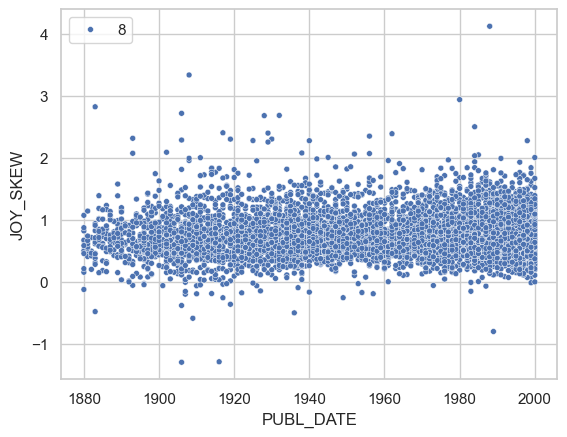

In [37]:
# Try to see if there is a correlation between the emotion entropy and the publication date
sns.scatterplot(data=merged_df, x='PUBL_DATE', y='EMOTION_ENTROPY', size=8)


### 💡 Additional features

with the additional measures of the Chicago Coprus (released in the [Chicago Corpus Repository](https://github.com/centre-for-humanities-computing/chicago_corpus)), we can check the relation between the emotion entropy and, for example, the rating count on GoodReads. Head on over to that repo to get the data...